In [1]:
from prepropeces import Handle_Files, Preprocess_Climate_Data
from Data_Viz import Plotter

import matplotlib.pyplot as plt

# Read the data

In [2]:
dir = "D:/"
file_name = "tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-201412.nc"

file_handler = Handle_Files()
pre_processer = Preprocess_Climate_Data()

ds = file_handler.read_netcdf_to_xr(directory=dir,
                                    file_name=file_name)

ds = pre_processer.covert_from_K_to_C(ds, 'tas')

print(ds.time)

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 ...
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T


# Plot on globe

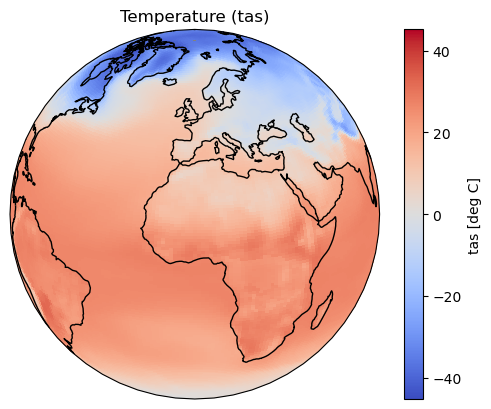

In [3]:
plotter = Plotter()
plotter.plot_on_globe(ds.tas.isel(time=0), 
                      cmap='coolwarm',
                      title='Temperature (tas)')

or:

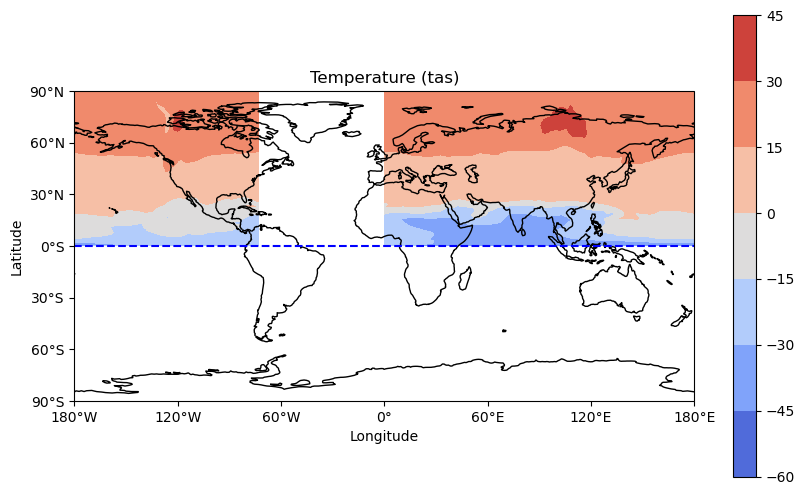

In [4]:
plotter.plot_on_map(ds.tas.isel(time=0), 
                    cmap='coolwarm',
                    title='Temperature (tas)')

# Create temporal climatologies

Examples:
1. Calculate the global average temperatures. Create monthly climatology in two supported ways.
2. Create yearly climatologie in all dimentions.

example 1:

In [4]:
print('with write_to_dataset=True')
dataset_with_tas_global_mean = pre_processer.create_global_mean(ds, 'tas')
dataset_with_tas_global_mean_monthly_climatology = pre_processer.create_temporal_climatology(dataset_with_tas_global_mean, var_name='tas_global_mean')
print(dataset_with_tas_global_mean_monthly_climatology)


# if write_to_original_dataset is set to false the function returns the dataarray instead of writing it to the original dataset
# then we need not specify the variable name in the function call for the climatology function
print('\n with write_to_dataset=False')
tas_global_mean = pre_processer.create_global_mean(ds, 'tas', write_to_original_dataset=False)
tas_global_mean_monthly_climatology = pre_processer.create_temporal_climatology(tas_global_mean)
print(tas_global_mean_monthly_climatology)

with write_to_dataset=True
<xarray.Dataset>
Dimensions:          (month: 12)
Coordinates:
    height           float64 ...
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tas_global_mean  (month) float32 2.562 2.049 2.056 ... 4.433 3.425 3.009

 with write_to_dataset=False
<xarray.Dataset>
Dimensions:          (month: 12)
Coordinates:
    height           float64 ...
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tas_global_mean  (month) float32 2.562 2.049 2.056 ... 4.433 3.425 3.009


We see a reduction in both time and spatial dimensions. The time dimensions is reduced from 1980 to 12 (monthly observations -> monthly climatology) and the spatial dimensions is reduced from 192x288 to 1 (latxlon -> global mean).

example 2:

In [5]:
dataset_anual_climatology = pre_processer.create_temporal_climatology(ds, var_name='tas', climatology_type='yearly')
print(dataset_anual_climatology)

<xarray.Dataset>
Dimensions:  (lon: 288, lat: 192, year: 165)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    height   float64 ...
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Data variables:
    tas      (year, lat, lon) float32 -46.94 -46.94 -46.94 ... -17.09 -17.09


We see a reduction only in the temporal dimensions. The time dimensions is reduced from 1980 to 165 (monthly observations -> annual observations).

# Create spatial climatologies

Examples:
1. Create a zonal mean climatology. Trigger saving and loading of transformed dataset. 
2. Create a meridional mean climatology. Plot the result.

example 1:

In [6]:
original_name = file_name[:-3]
dataset_zonal_climatology = pre_processer.create_spatial_climatology(ds, var_name='tas', climatology_type='zonal', save_to_dataset=True, file_name=original_name)
print(dataset_zonal_climatology)

# we now have a new dataset in the datafiles directory
file_handler.get_all_netcdf_files_in_dir(file_handler.data_dir)

D:\Programmering\FYS-STK4155\FYS-STK4155\My  Notes\Preface project 3 DataFiles/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-201412_zonal_climatology.nc
<xarray.Dataset>
Dimensions:  (lat: 192, time: 1980)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    height   float64 ...
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    tas      (time, lat) float32 ...


D:\Python\envs\DataAnalysis\Lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


['tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-201412_zonal_climatology.nc']

example 2:

<xarray.Dataset>
Dimensions:  (lon: 288, time: 1980)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 ...
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    tas      (time, lon) float32 5.12 5.118 5.107 5.116 ... 5.446 5.444 5.507


Text(0, 0.5, 'Temperature (C)')

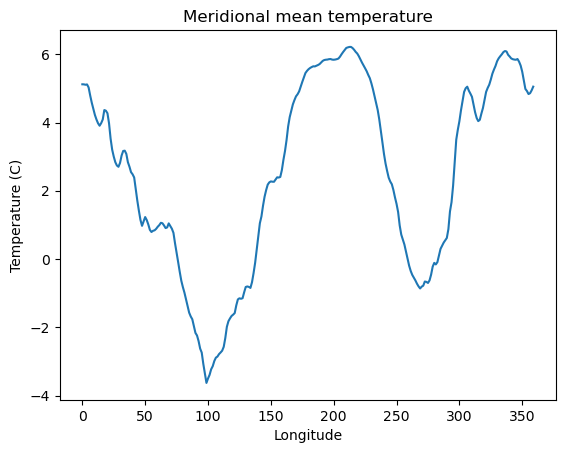

In [28]:
dataset_meridional_climatology = pre_processer.create_spatial_climatology(ds, var_name='tas', climatology_type='meridional')
print(dataset_meridional_climatology)
plt.plot(dataset_meridional_climatology.lon, dataset_meridional_climatology.tas[0,:])
plt.title('Meridional mean temperature')
plt.xlabel('Longitude')
plt.ylabel('Temperature (C)')